In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지


In [2]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0
...,...,...,...,...,...,...,...,...
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0


In [3]:
# df['측정일시'] : 20220101 => '2022-01-01' => datetime 형으로 형변환(df['측정일'])
df['측정일'] = df['측정일시'].astype(str)
df['측정일'] = df['측정일'].str[:4] + '-' + df['측정일'].str[4:6] + '-' + df['측정일'].str[6:]
df['측정일'] = df['측정일'].astype('datetime64[ns]')

In [4]:
# 결측치를 갖고 있는 측정소들 조회
df[df['이산화질소농도(ppm)'].isna()]['측정소명'].unique()

array(['관악산', '서대문구', '항동', '북한산', '동작대로', '송파구', '동대문구', '한강대로', '시흥대로',
       '행주', '관악구'], dtype=object)

In [5]:
# 결측치가 없는 공항대로로 통계 분석
df_flt = df[df['측정소명'] == '공항대로']
df_flt.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
44,20220101,공항대로,0.035,0.010,0.6,0.002,31.0,15.0,2022-01-01
93,20220102,공항대로,0.027,0.017,0.5,0.003,37.0,22.0,2022-01-02
143,20220103,공항대로,0.041,0.007,0.6,0.003,31.0,18.0,2022-01-03
196,20220104,공항대로,0.032,0.010,0.5,0.003,48.0,21.0,2022-01-04
244,20220105,공항대로,0.045,0.004,0.8,0.003,56.0,34.0,2022-01-05


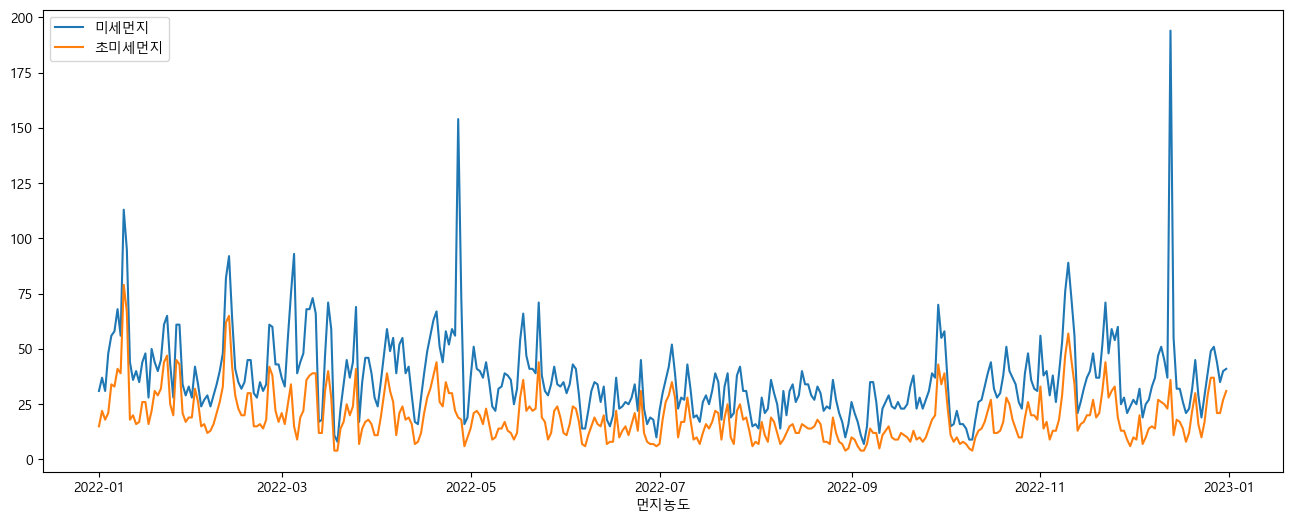

In [6]:
plt.figure(figsize=(16,6))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.xlabel('측정일시')
plt.xlabel('먼지농도')
plt.legend(loc='upper left')

In [7]:
df_flt2 = df_flt[['측정일','미세먼지농도(㎍/㎥)']]
ts = df_flt2.set_index('측정일')
ts.head()

,미세먼지농도(㎍/㎥)
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


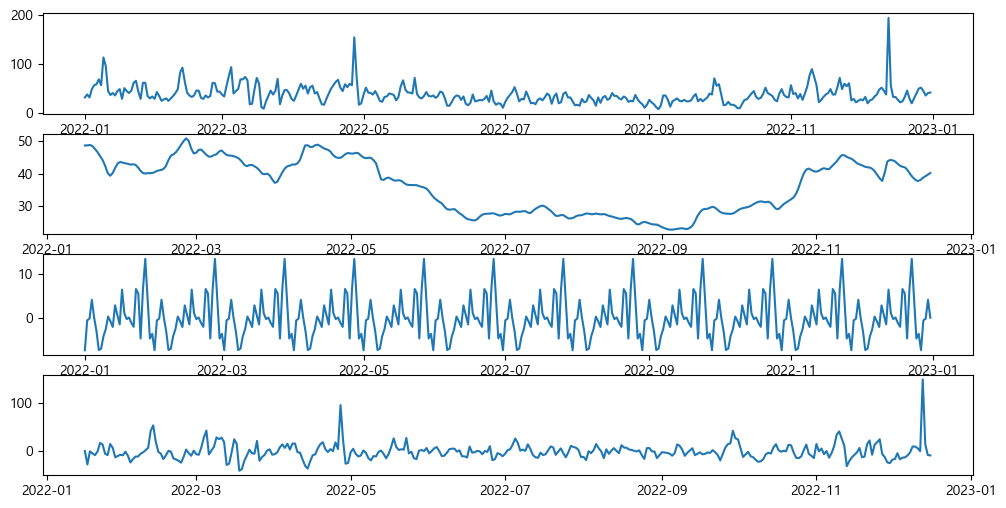

In [8]:
# 시계열 데이터의 구조를 분해해 주는 도구
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'],
                            model='additive', # 실제값 추세, 계정성, 잔차를 덧셈으로 분석
                            period=30) # 한달 단위로 계정성을 분석
# result : 분석결과
# result.observed : 실제 데이터
# result.trend : 데이터의 장기적인 변화. 전반적으로 감소, 증가 
# result.seasonal : 주기적인 계절성 패턴
# result.resid : 잔차(실제값에서 추세와 계절성을 뺀 노이즈)
fig, axes = plt.subplots(4,1, figsize=(12,6))
axes[0].plot(result.observed)
axes[1].plot(result.trend)
axes[2].plot(result.seasonal)
axes[3].plot(result.resid)

In [9]:
def plot_seasonal_decompose(result):
    fig, axes = plt.subplots(4,1, figsize=(12,6))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('관측값')
    axes[1].plot(result.trend)
    axes[1].set_ylabel('트렌드')
    axes[2].plot(result.seasonal)
    axes[2].set_ylabel('계절성')
    axes[3].plot(result.resid)
    axes[3].set_ylabel('잔차')
    plt.xlabel('날짜')
    plt.tight_layout()
    plt.show()

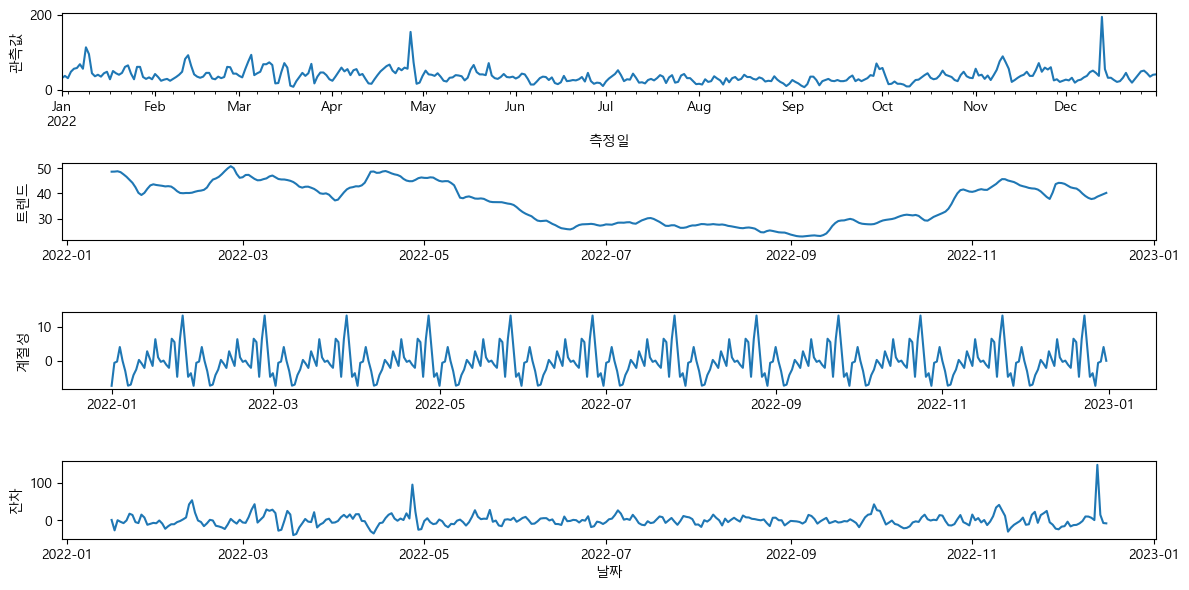

In [10]:
plot_seasonal_decompose(result)

## seasonal_decompose(통계적 분석) & RNN/LSTM/GRU(예측) & Prompt(예측)

## Prophet
- 계절성, 추세, 휴일효과 등을 자동으로 모델링
- pip install prophet

In [11]:
df_flt2.columns = ['ds', 'y'] # prophet의 fit시 컬럼명을 df, y
df_flt2

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0
...,...,...
18043,2022-12-27,51.0
18095,2022-12-28,44.0
18143,2022-12-29,35.0
18193,2022-12-30,40.0
